# **Installing Proper Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



In [2]:
!pip install catboost
from catboost import CatBoostClassifier

# **File Reading**

In [3]:
df=pd.read_csv("/content/sample_data/bank-additional-full.csv",sep=';')

# **Some Informations About Variables in Dataset**

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print(df.size)
print(df.shape)
print(df.ndim)

864948
(41188, 21)
2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# **Converting Objects To Categorical Variables**

In [8]:
obj_list=list(df.select_dtypes(['object']).columns)

In [9]:
for colname in obj_list:
    df[colname]=df[colname].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

# **Duplicated Variable Detection and Dropping**

In [11]:
df.duplicated().sum()

12

In [12]:
df.loc[df.duplicated(keep=False),:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [13]:
df.iloc[1265,:]

age                        39
job               blue-collar
marital               married
education            basic.6y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               thu
duration                  124
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.855
nr.employed            5191.0
y                          no
Name: 1265, dtype: object

In [14]:
df.iloc[1266,:]

age                        39
job               blue-collar
marital               married
education            basic.6y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               thu
duration                  124
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.855
nr.employed            5191.0
y                          no
Name: 1266, dtype: object

In [15]:
df.iloc[25183,:]

age                              39
job                          admin.
marital                     married
education         university.degree
default                          no
housing                          no
loan                             no
contact                    cellular
month                           nov
day_of_week                     tue
duration                        123
campaign                          2
pdays                           999
previous                          0
poutcome                nonexistent
emp.var.rate                   -0.1
cons.price.idx                 93.2
cons.conf.idx                 -42.0
euribor3m                     4.153
nr.employed                  5195.8
y                                no
Name: 25183, dtype: object

In [16]:
df.iloc[25217,:]

age                              39
job                          admin.
marital                     married
education         university.degree
default                          no
housing                          no
loan                             no
contact                    cellular
month                           nov
day_of_week                     tue
duration                        123
campaign                          2
pdays                           999
previous                          0
poutcome                nonexistent
emp.var.rate                   -0.1
cons.price.idx                 93.2
cons.conf.idx                 -42.0
euribor3m                     4.153
nr.employed                  5195.8
y                                no
Name: 25217, dtype: object

As we can see,there are duplicated variables in this dataset so we should drop them

In [17]:
df.drop_duplicates(inplace=True)

# **Unique Variables**

In [18]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# **Seperating Numerical Columns**

In [19]:
num_cols=(df.select_dtypes(["int64","float64"]))

In [20]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


# **Outlier Detection**

In [21]:
def OTH(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit


In [22]:
def detection(dataframe,col_name):
    low_limit,up_limit=OTH(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False

In [23]:
for col in list(num_cols):
    print(col,detection(df,col))


age 9.5 69.5
age True
duration -223.5 644.5
duration True
campaign -2.0 6.0
campaign True
pdays 999.0 999.0
pdays True
previous 0.0 0.0
previous True
emp.var.rate -6.6000000000000005 6.200000000000001
emp.var.rate False
cons.price.idx 91.69650000000001 95.3725
cons.price.idx False
cons.conf.idx -52.150000000000006 -26.949999999999992
cons.conf.idx True
euribor3m -4.081499999999999 10.3865
euribor3m False
nr.employed 4905.6 5421.6
nr.employed False


<ipython-input-22-f23ad1095fb1>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
<ipython-input-22-f23ad1095fb1>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
<ipython-input-22-f23ad1095fb1>:3: FutureWarning: The default value of bool_only in DataFrame.any is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is de

After the up and low limit values were taken from IQR, they were checked.

In [24]:
(df["previous"]==0).sum()

35551

<Axes: xlabel='previous', ylabel='Count'>

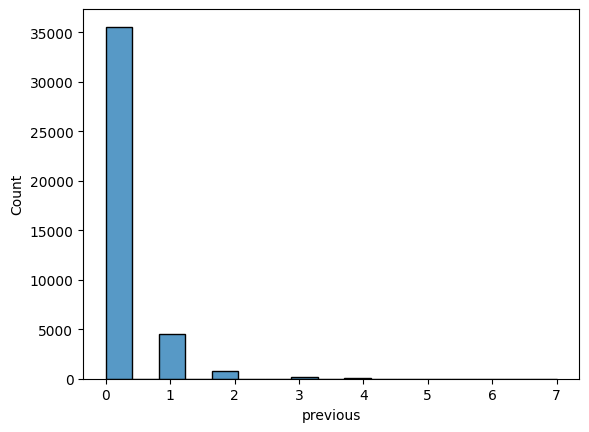

In [25]:
sns.histplot(df["previous"])

In [26]:
(df["pdays"]==999).sum()

39661

<Axes: xlabel='pdays', ylabel='Count'>

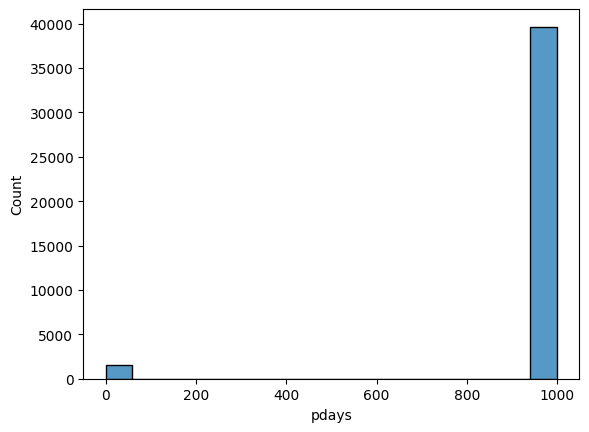

In [27]:
sns.histplot(df["pdays"])

In [28]:
(df["age"]>69.5).sum()

468

# **Boxplot of Variables That Have Outliers**

Text(0.5, 1.0, ' Cons.Conf Boxplot')

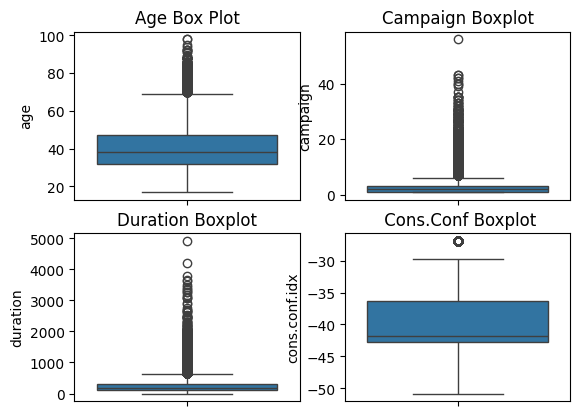

In [29]:
plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.title("Age Box Plot")


plt.subplot(2,2,3)
sns.boxplot(df["duration"])
plt.title("Duration Boxplot")


plt.subplot(2,2,2)
sns.boxplot(df["campaign"])
plt.title("Campaign Boxplot")


plt.subplot(2,2,4)
sns.boxplot(df["cons.conf.idx"])
plt.title(" Cons.Conf Boxplot")

For sales, each age group can show different interest so they got seperated to three

In [30]:
df["age_cut"]=pd.cut(x=df["age"],bins=[df["age"].min(),40,60,df["age"].max()],labels=["young_adults","middle_age_adults","senior_adults"])

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_cut
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age_adults
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age_adults
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young_adults
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young_adults
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,middle_age_adults


In [32]:
df.groupby(df["age_cut"])["y"].value_counts()

age_cut            y  
young_adults       no     21037
                   yes     2719
middle_age_adults  no     15002
                   yes     1504
senior_adults      no       495
                   yes      414
Name: y, dtype: int64

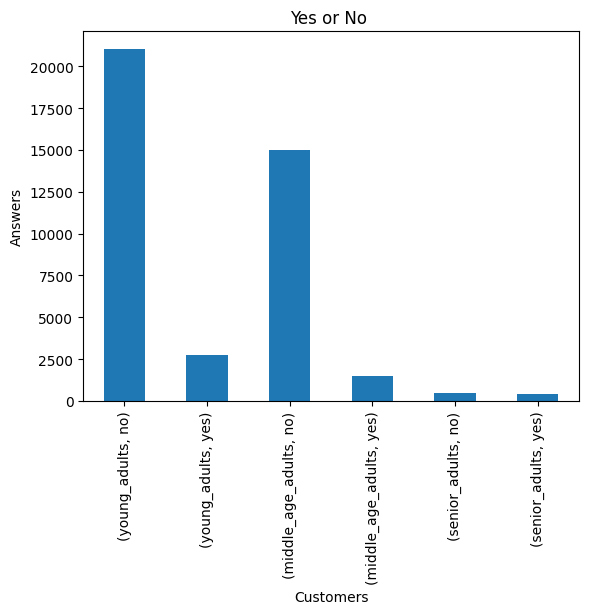

In [33]:
df.groupby(df["age_cut"])["y"].value_counts().plot(kind='bar')
plt.xlabel('Customers')
plt.ylabel('Answers')
plt.title('Yes or No ')
plt.show()

As we can see,majority of age datas(even for different age groups) shows similar patterns. Only senior adults have different pattern however their number is so less compared to whole age data and some of them are labeled as outlier.

In [34]:
df.drop("age_cut",inplace=True,axis=1)

# **Outlier Handling**

In [35]:
def replace(dataframe,variables):
    low_limit, up_limit= OTH(dataframe,variables)
    dataframe.loc[(dataframe[variables]<low_limit),variables]=low_limit
    dataframe.loc[(dataframe[variables]>up_limit),variables]=up_limit

In [36]:
for col in num_cols:
    print(col,replace(df,col))


age 9.5 69.5
age None
duration -223.5 644.5
duration None
campaign -2.0 6.0
campaign None
pdays 999.0 999.0
pdays None
previous 0.0 0.0
previous None
emp.var.rate -6.6000000000000005 6.200000000000001
emp.var.rate None
cons.price.idx 91.69650000000001 95.3725
cons.price.idx None
cons.conf.idx -52.150000000000006 -26.949999999999992
cons.conf.idx None
euribor3m -4.081499999999999 10.3865
euribor3m None
nr.employed 4905.6 5421.6
nr.employed None


# **Data Visualization**

<ipython-input-37-995d5dc2f6ea>:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(y="y",data=df,inner="quartile",bw=0.2)


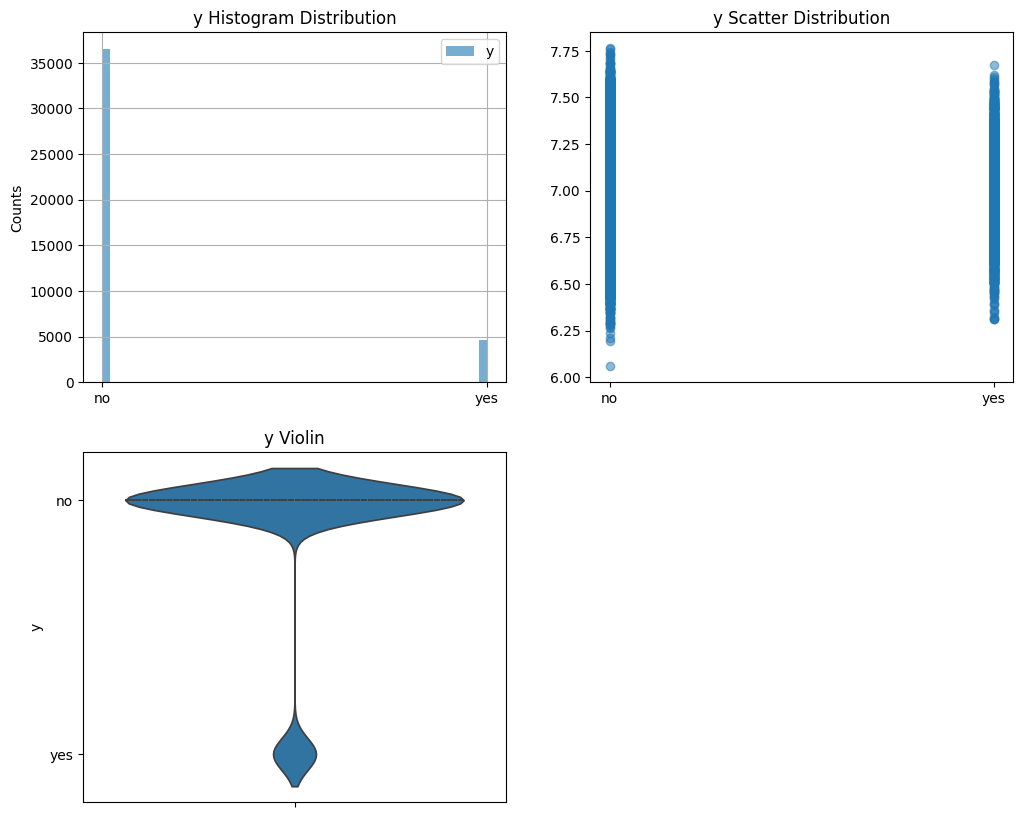

In [37]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
df["y"].hist(bins=50,label="y",alpha=0.6)
plt.ylabel("Counts")
plt.title("y Histogram Distribution");
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df["y"],np.random.normal(7,0.2,size=df.shape[0]),alpha=0.5)
plt.title("y Scatter Distribution");

plt.subplot(2,2,3)
sns.violinplot(y="y",data=df,inner="quartile",bw=0.2)
plt.title("y Violin");

As we can see, big majority of answers are No

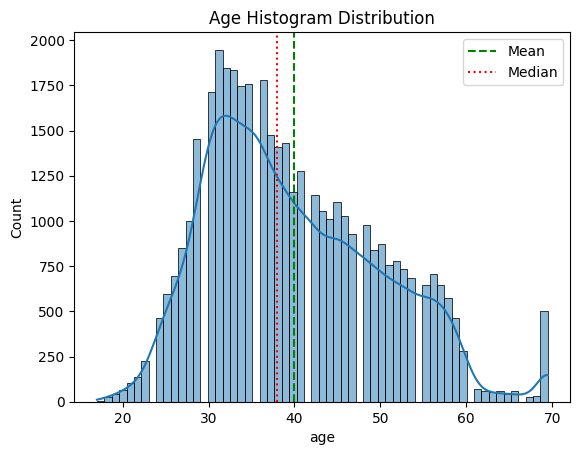

In [38]:
sns.histplot(df["age"],kde=True)
plt.axvline(np.mean(df["age"]),ls="--",c="g",label="Mean")
plt.axvline(np.median(df["age"]),ls=":",c="r",label="Median")
plt.title("Age Histogram Distribution");
plt.legend()

Average age and Median Age are close to 40

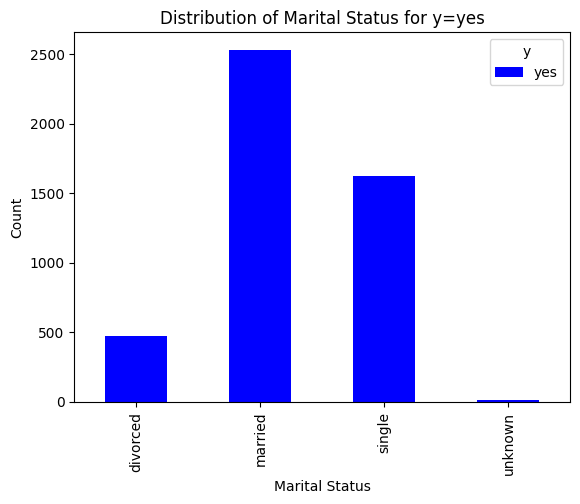

In [39]:
cross_table = pd.crosstab(df[df['y'] == 'yes']['marital'], df[df['y'] == 'yes']['y'])
cross_table.plot(kind='bar', stacked=False,color=["b"])
# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status for y=yes')
# Show the plot
plt.show()

Married people mostly tend to reply as yes. Divorced people however least one.

<ipython-input-40-788b27e19bb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])
<ipython-input-40-788b27e19bb4>:1: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])


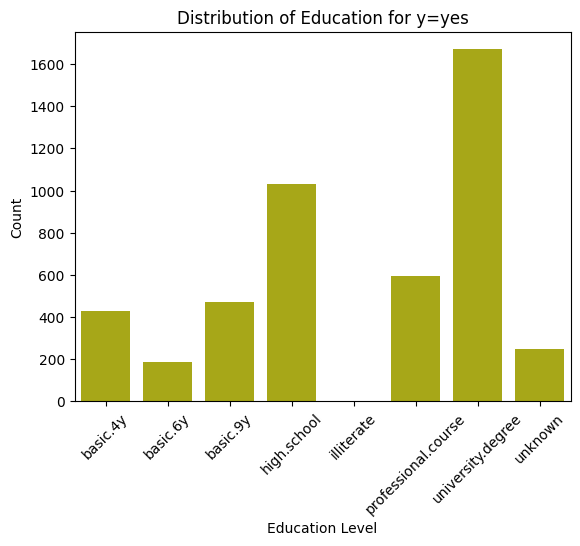

In [40]:
sns.countplot(x='education', data=df[df['y'] == 'yes'],palette=["y"])

plt.xticks(rotation=45)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education for y=yes')
# Show the plot
plt.show()

University degree holders tends to say yes most compared to other education levels.

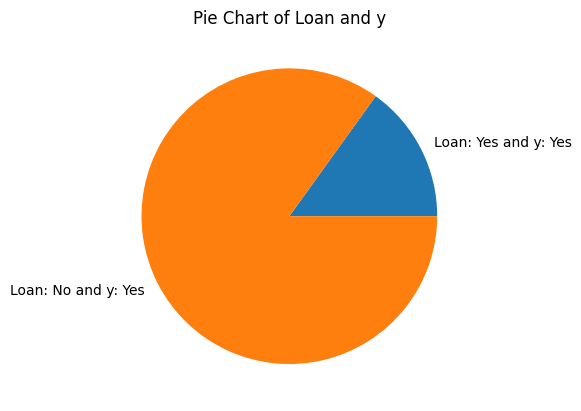

In [41]:
yes_loan_count_yes= ((df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts().get(True, 0)
no_loan_count_yes = ((df['loan'] == 'no') & (df['y'] == 'yes')).value_counts().get(True, 0)

numbers = [yes_loan_count_yes, no_loan_count_yes]
labels = ['Loan: Yes and y: Yes', 'Loan: No and y: Yes']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Loan and y')

plt.show()

The ones who don't have personal loans tend to say yes more than the ones who have it.

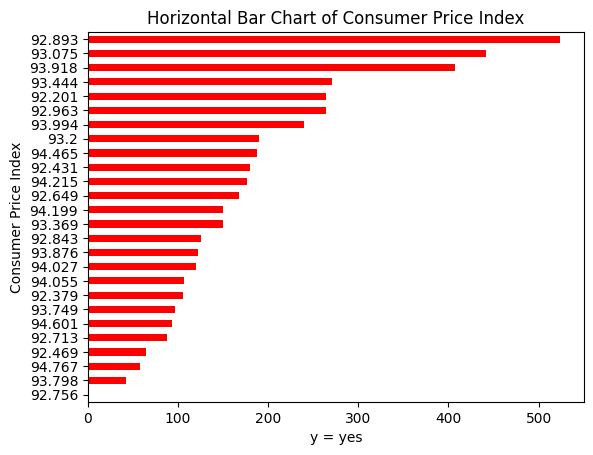

In [42]:
cons_price_idx = (df[df['y'] == 'yes']['cons.price.idx'].value_counts()).sort_values()
cons_price_idx.plot(kind='barh', color='r')
plt.ylabel('Consumer Price Index')
plt.xlabel('y = yes')
plt.title('Horizontal Bar Chart of Consumer Price Index')
plt.show()

# **Heatmap**

<Axes: >

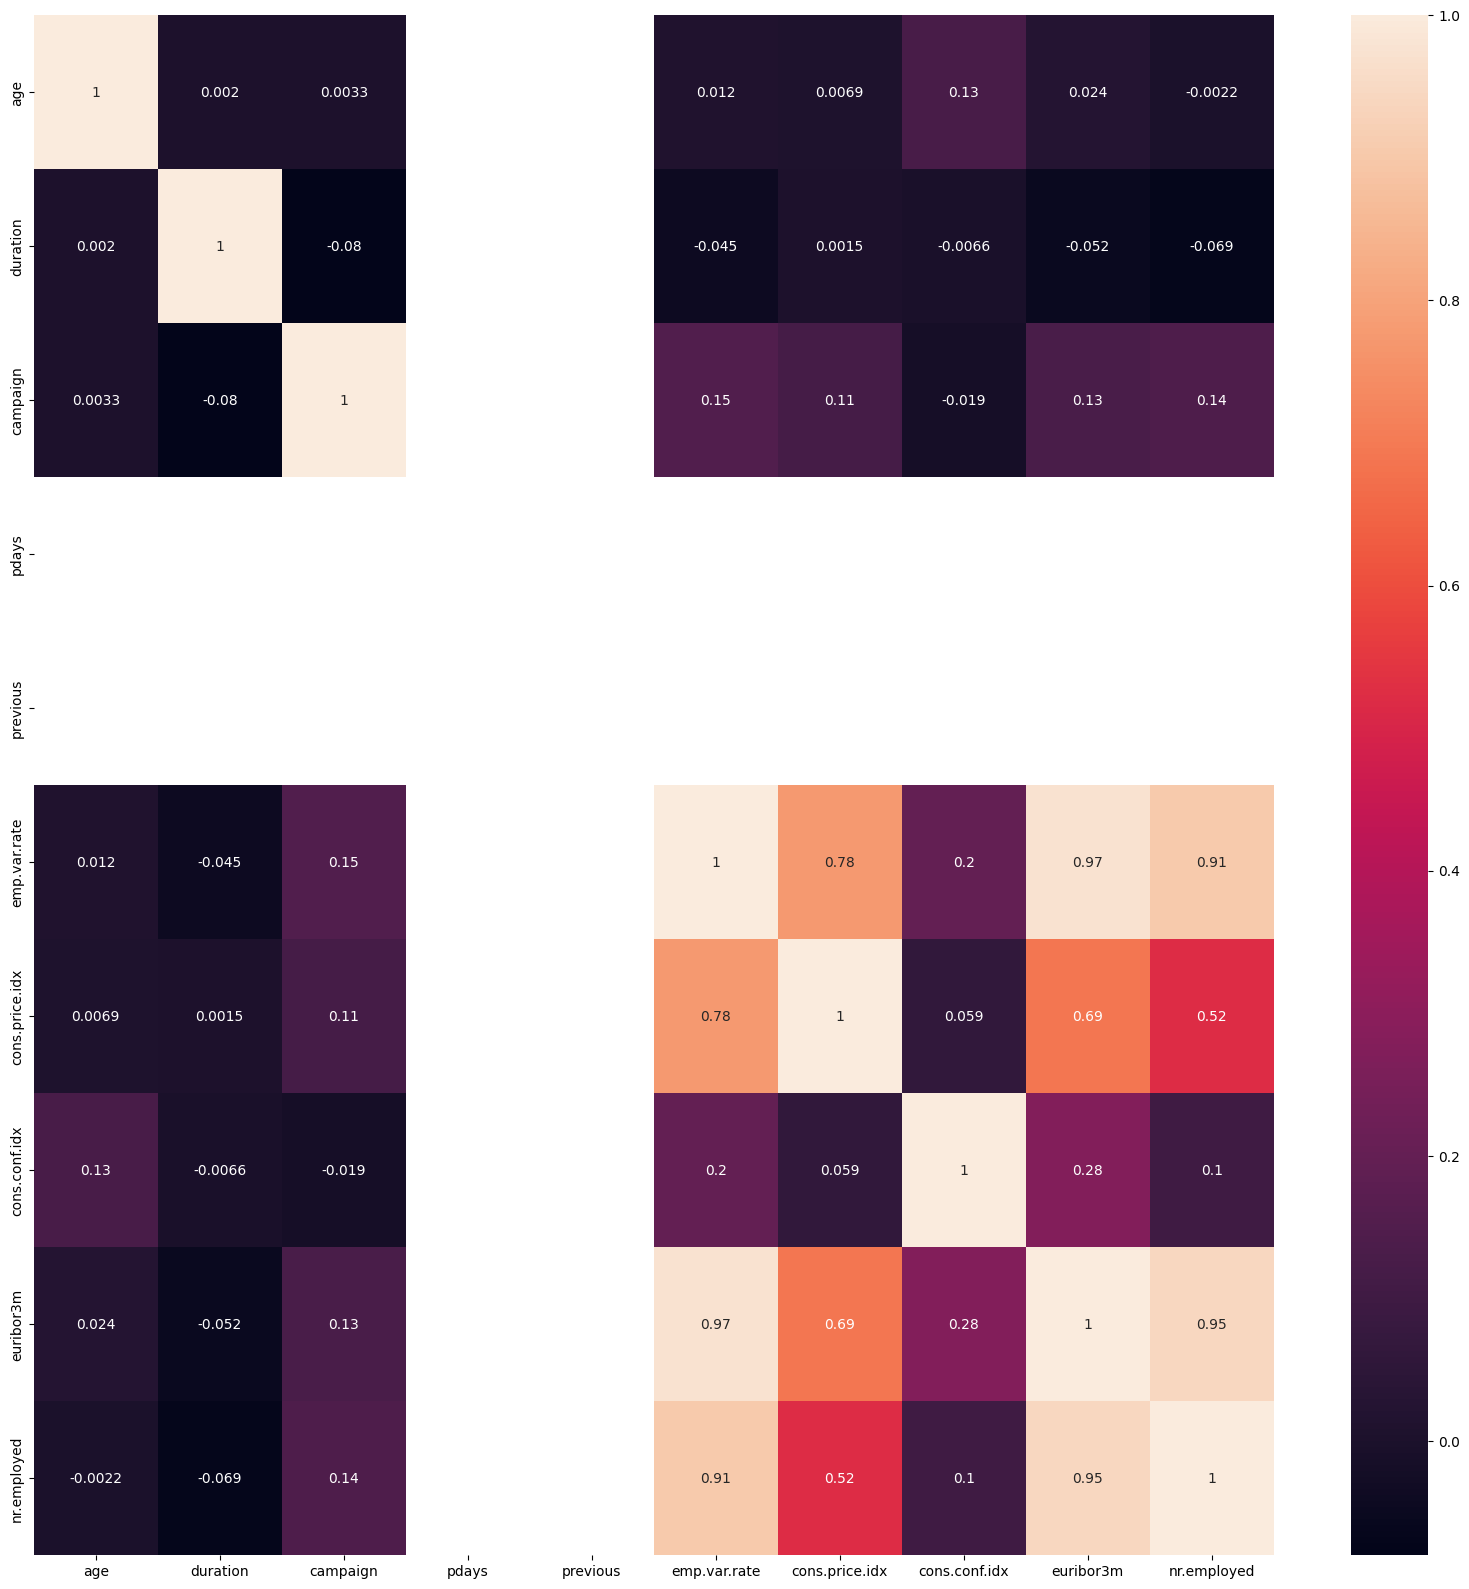

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(num_cols)].corr(),annot=True)

As we can see euribor3m and emp.var.rate and nr.employed have really high correlation. That's why euribor3m and emp.var.rate will be dropped to not increase the model complexity

In [44]:
df.drop("euribor3m",inplace=True,axis=1)

In [45]:
df.drop("emp.var.rate",inplace=True,axis=1)

# **Converting to Unknown Variables to Null Variables**

In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
dtype: int64

If duration number is 0,it means call didn't happen. So answer will be no automatically. It is wrong and can affect the model wrong.

In [47]:
df["duration"].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)

In [48]:
(df["duration"]==0).sum()

4

In [49]:
df[df["duration"]==0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
6251,39.0,admin.,married,high.school,no,yes,no,telephone,may,tue,0.0,4,999,0,nonexistent,93.994,-36.4,5191.0,no
23031,59.0,management,married,university.degree,no,yes,no,cellular,aug,tue,0.0,6,999,0,nonexistent,93.444,-36.1,5228.1,no
28063,53.0,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0.0,3,999,0,nonexistent,93.075,-47.1,5099.1,no
33015,31.0,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0.0,2,999,0,nonexistent,92.893,-46.2,5099.1,no


In [50]:
df.drop(df[(df["duration"]==0)].index,inplace=True)

In [51]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,999,0,nonexistent,93.994,-36.4,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1,999,0,nonexistent,93.994,-36.4,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,999,0,nonexistent,93.994,-36.4,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,999,0,nonexistent,93.994,-36.4,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,999,0,nonexistent,93.994,-36.4,5191.0,no


In [52]:
(df["duration"]==0).sum()

0

In [53]:
cat_cols=df.select_dtypes("category")

In [54]:
cat_cols=list(cat_cols)

In [55]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [56]:
(df[list(cat_cols)]=="unknown").sum()

job             330
marital          80
education      1730
default        8596
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

In [57]:
df[["job","marital","loan","default","housing","education"]]=df[["job","marital","loan","default","housing","education"]].replace("unknown",np.NaN)

In [58]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
cons.price.idx       0
cons.conf.idx        0
nr.employed          0
y                    0
dtype: int64

To understand that missing values are MACR or MAR, missingno can be used.

In [59]:
!pip install missingno

In [60]:
import missingno as msno

<Axes: >

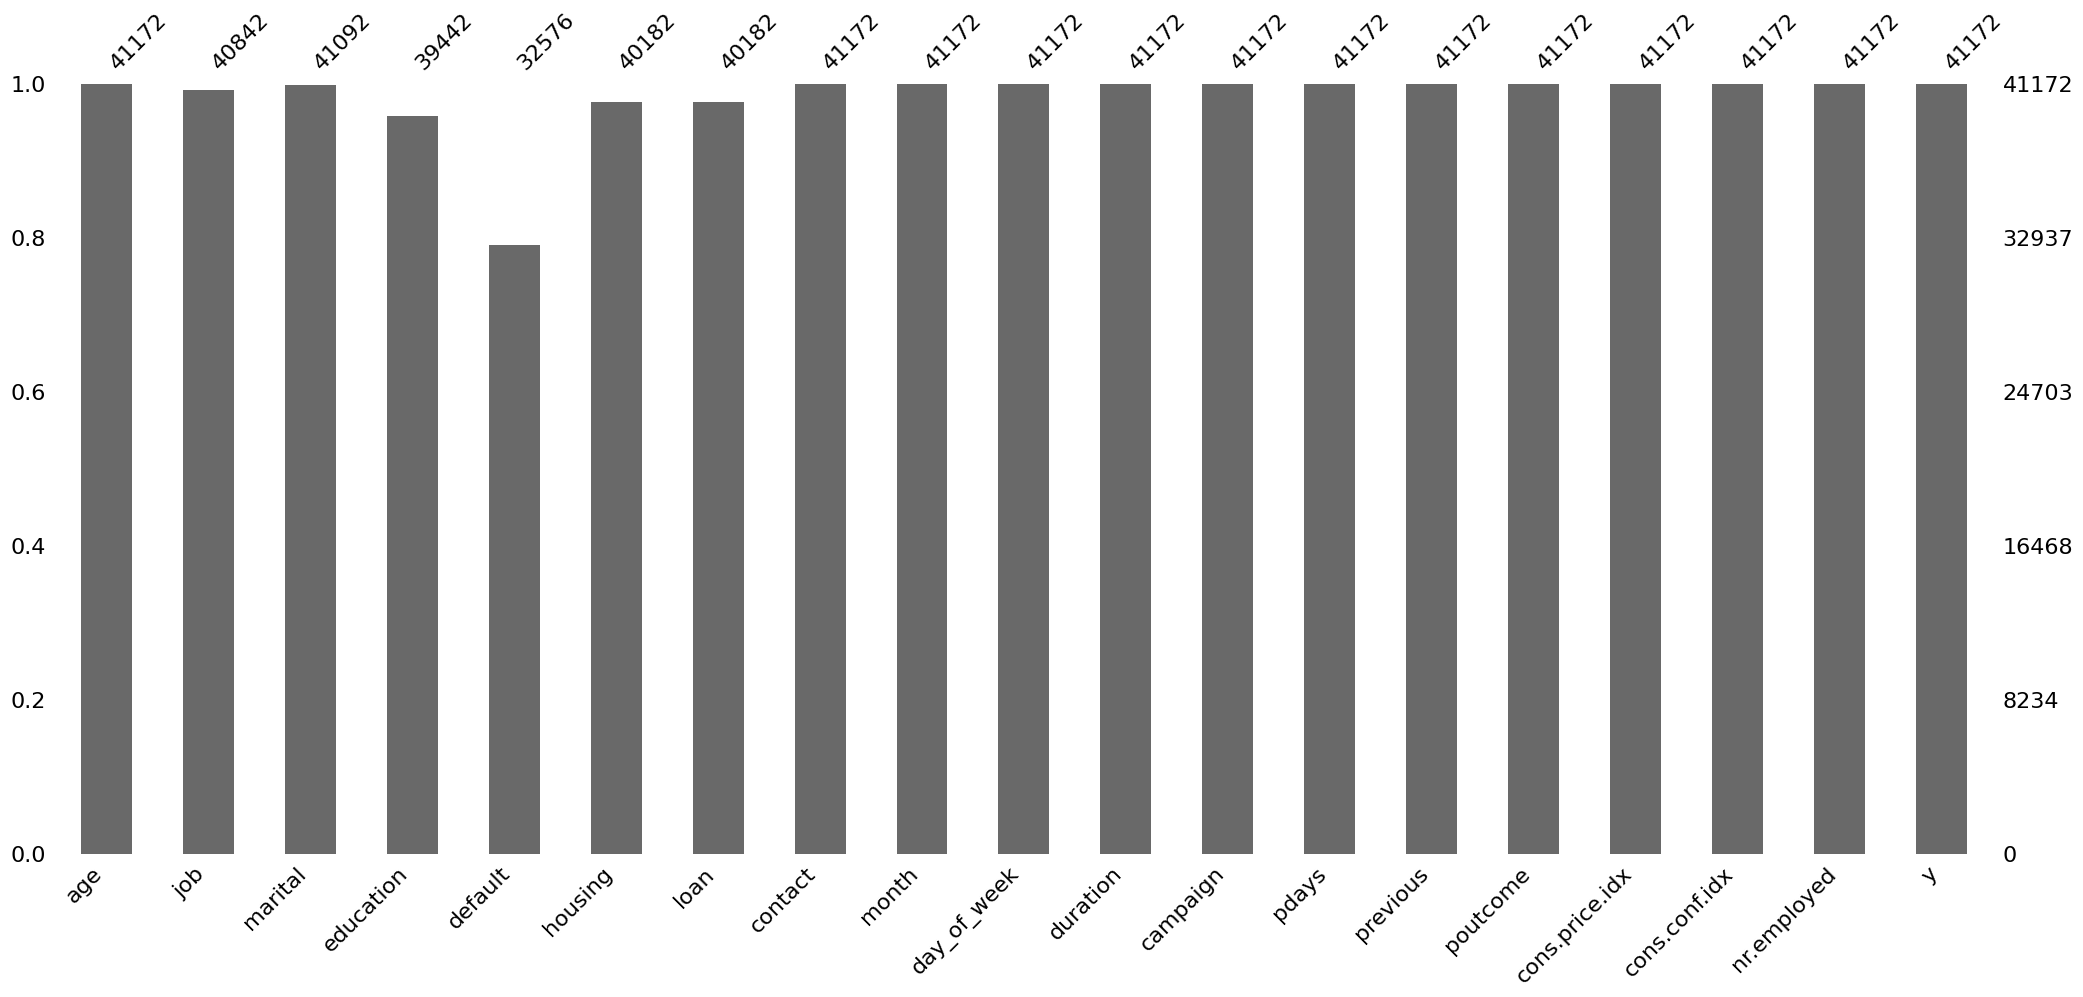

In [61]:
msno.bar(df)

In [62]:
df.isnull().mean()*100

age                0.000000
job                0.801516
marital            0.194307
education          4.201885
default           20.878267
housing            2.404547
loan               2.404547
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

<Axes: >

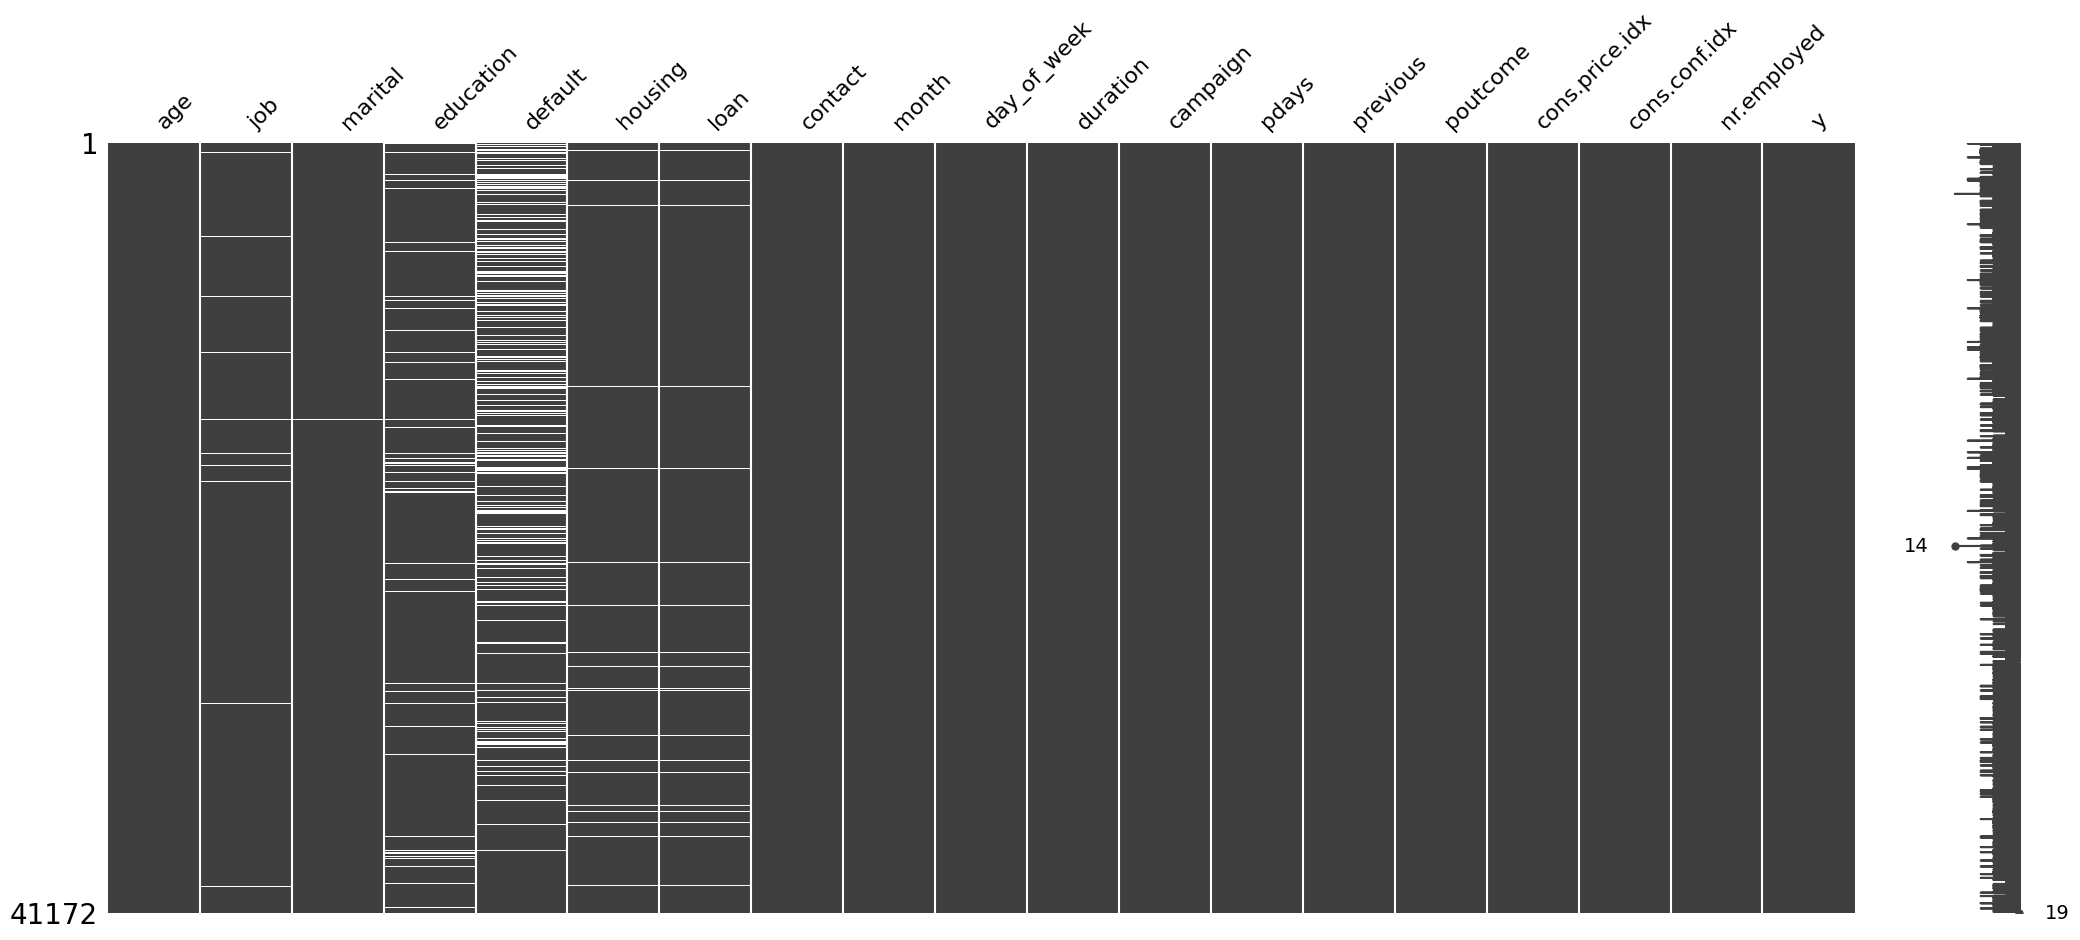

In [63]:
msno.matrix(df)

<Axes: >

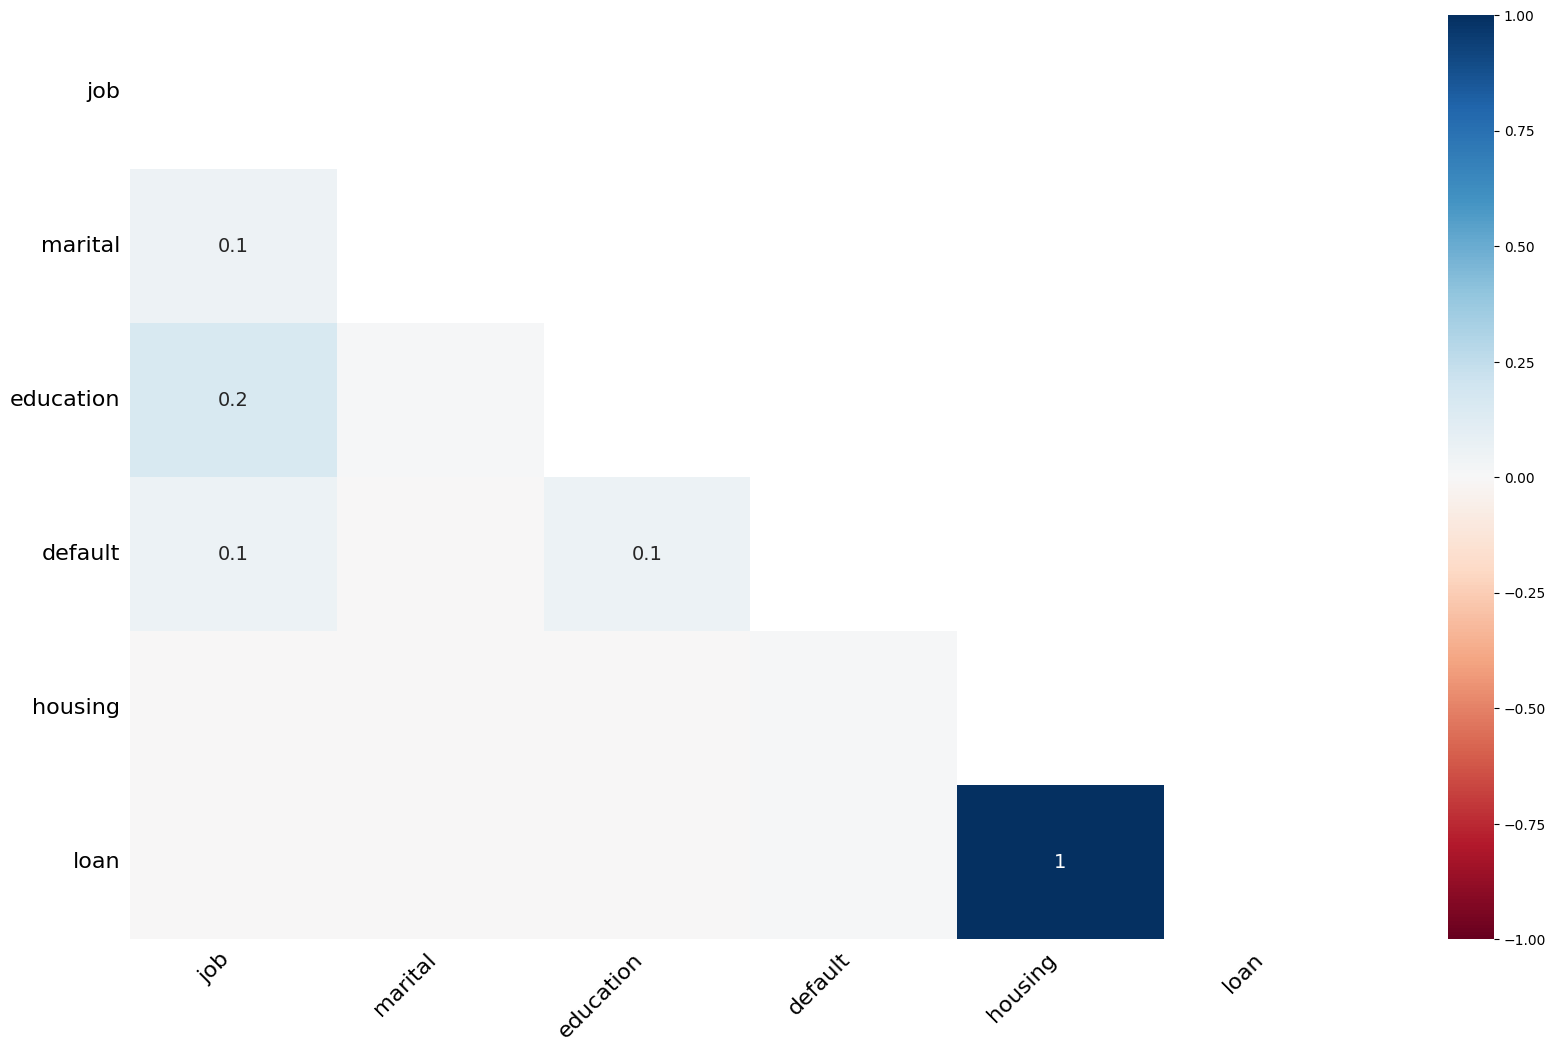

In [64]:
msno.heatmap(df)

<Axes: >

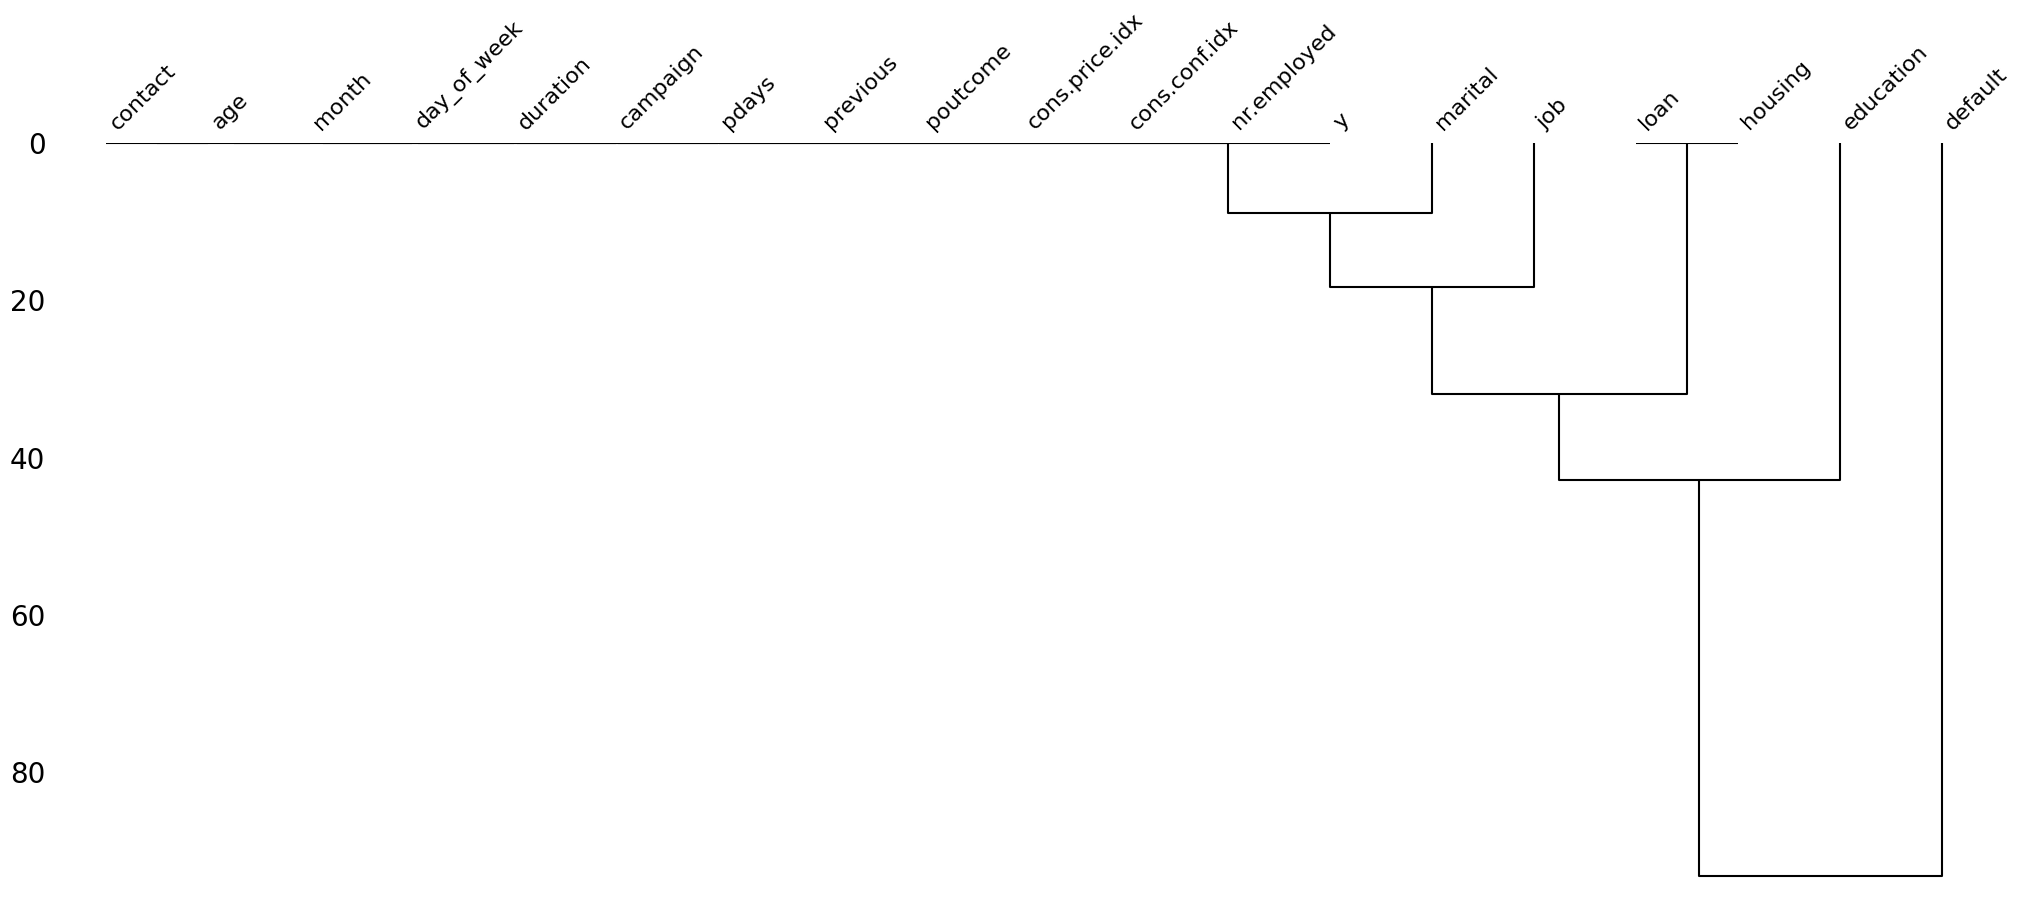

In [65]:
msno.dendrogram(df)

As we can see, some missing values have correlation. They can be MAR. To examine the relationship between columns which has missing values and other categorical columns,chi squared independence test can help(since all missing columns are categorical and nominal)

In [66]:
from scipy import stats

In [67]:
missing=["job","marital","loan","default","housing","education"]

In [68]:
import itertools
combinations = list(itertools.combinations(cat_cols, 2))
print(combinations)

[('job', 'marital'), ('job', 'education'), ('job', 'default'), ('job', 'housing'), ('job', 'loan'), ('job', 'contact'), ('job', 'month'), ('job', 'day_of_week'), ('job', 'poutcome'), ('job', 'y'), ('marital', 'education'), ('marital', 'default'), ('marital', 'housing'), ('marital', 'loan'), ('marital', 'contact'), ('marital', 'month'), ('marital', 'day_of_week'), ('marital', 'poutcome'), ('marital', 'y'), ('education', 'default'), ('education', 'housing'), ('education', 'loan'), ('education', 'contact'), ('education', 'month'), ('education', 'day_of_week'), ('education', 'poutcome'), ('education', 'y'), ('default', 'housing'), ('default', 'loan'), ('default', 'contact'), ('default', 'month'), ('default', 'day_of_week'), ('default', 'poutcome'), ('default', 'y'), ('housing', 'loan'), ('housing', 'contact'), ('housing', 'month'), ('housing', 'day_of_week'), ('housing', 'poutcome'), ('housing', 'y'), ('loan', 'contact'), ('loan', 'month'), ('loan', 'day_of_week'), ('loan', 'poutcome'), ('

In [69]:
for i,j in combinations:
  crosstab=pd.crosstab(df[i],df[j])
  if stats.chi2_contingency(crosstab)[1]<0.05:
    if i in missing:
       print(i,j,stats.chi2_contingency(crosstab)[1])


job marital 0.0
job education 0.0
job default 0.04863854171720015
job housing 0.013411875352040156
job loan 0.022492655671945427
job contact 5.360273512067301e-136
job month 0.0
job day_of_week 0.0007254553273291029
job poutcome 1.3119604391744755e-162
job y 3.6476242208953805e-200
marital education 0.0
marital housing 0.014613297594305522
marital contact 1.12385736600073e-47
marital month 3.6396240127212334e-58
marital day_of_week 0.00686212174333328
marital poutcome 4.1623683369329297e-23
marital y 3.544604703700862e-27
education housing 0.0020037226550549967
education contact 6.562223147633329e-130
education month 0.0
education day_of_week 6.946444824727787e-07
education poutcome 8.65738230864583e-26
education y 2.6810796900478393e-35
default day_of_week 0.015067797757281672
housing loan 1.41238091224754e-20
housing contact 5.118583995270082e-62
housing month 3.698299812900071e-44
housing day_of_week 0.0003184155945028157
housing poutcome 2.140968856923508e-06
housing y 0.0194070188

As we can see columns that have missing values have correlation between other categorical columns.(since p values are smaller than 0.05,hypothesis 0 which claims that all variables are independent were refused.)

# **Missing Data Imputation and Encoding**

Since there are correlations between categorical datas, missForest imputer algorithm can be used. But first all categorical variables must be encoded

In [70]:

    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer




    categorical = cat_cols


    df[categorical] = df[categorical].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

    print(df)


    imp_cat = IterativeImputer(estimator=RandomForestClassifier(n_jobs=1),
                               initial_strategy='most_frequent',
                               max_iter=5, random_state=0)

    df[categorical] = imp_cat.fit_transform(df[categorical])

    print(df)

        age  job  marital  education  default  housing  loan  contact  month  \
0      56.0  3.0      1.0        0.0      0.0      0.0   0.0        1      6   
1      57.0  7.0      1.0        3.0      NaN      0.0   0.0        1      6   
2      37.0  7.0      1.0        3.0      0.0      1.0   0.0        1      6   
3      40.0  0.0      1.0        1.0      0.0      0.0   0.0        1      6   
4      56.0  7.0      1.0        3.0      0.0      0.0   1.0        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183  69.5  5.0      1.0        5.0      0.0      1.0   0.0        0      7   
41184  46.0  1.0      1.0        5.0      0.0      0.0   0.0        0      7   
41185  56.0  5.0      1.0        6.0      0.0      1.0   0.0        0      7   
41186  44.0  9.0      1.0        5.0      0.0      0.0   0.0        0      7   
41187  69.5  5.0      1.0        5.0      0.0      1.0   0.0        0      7   

       day_of_week  duration  campaign 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [71]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
dtype: int64

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,1,999,0,1.0,93.994,-36.4,5191.0,0.0
1,57.0,7.0,1.0,3.0,0.0,0.0,0.0,1.0,6.0,1.0,149.0,1,999,0,1.0,93.994,-36.4,5191.0,0.0
2,37.0,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,226.0,1,999,0,1.0,93.994,-36.4,5191.0,0.0
3,40.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151.0,1,999,0,1.0,93.994,-36.4,5191.0,0.0
4,56.0,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,307.0,1,999,0,1.0,93.994,-36.4,5191.0,0.0


# **Scaling and Model Training**

In [73]:
X=df.drop("y",axis=1)
y=df["y"]

We used the MinMaxScaler here because the dataset hasn't got a gaussian distribution. Instead of it, it has a skewed one

In [74]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [76]:
models_dict = {
    'LogisticRegression': {
    'model': LogisticRegression()},

  'SVC': {
    'model': SVC()
  },
  'Naives': {
    'model': GaussianNB()
  },
  'KNeighborsClassifier': {
    'model': KNeighborsClassifier()
  },
  'RandomForestClassifier': {
    'model': RandomForestClassifier()
  },
  'GradientBoostingClassifier': {
    'model': GradientBoostingClassifier()
  },
   'CatBoostClassifier':  {
      'model': CatBoostClassifier(metric_period=100)
   }

  }

In [77]:
for key, item in models_dict.items():
  model = item.get('model')

  model.fit(X_train,y_train)

Learning rate set to 0.045813
0:	learn: 0.6137390	total: 74.1ms	remaining: 1m 14s
100:	learn: 0.1749461	total: 1.01s	remaining: 8.96s
200:	learn: 0.1657486	total: 2.6s	remaining: 10.3s
300:	learn: 0.1590236	total: 4.42s	remaining: 10.3s
400:	learn: 0.1528446	total: 5.35s	remaining: 8s
500:	learn: 0.1469777	total: 6.26s	remaining: 6.24s
600:	learn: 0.1419329	total: 7.19s	remaining: 4.78s
700:	learn: 0.1374959	total: 8.12s	remaining: 3.46s
800:	learn: 0.1331803	total: 9.28s	remaining: 2.31s
900:	learn: 0.1295261	total: 11.5s	remaining: 1.27s
999:	learn: 0.1259214	total: 12.4s	remaining: 0us


In [78]:
def classification_performance_evaluation(key,preds):
  accuracy_scored = accuracy_score(y_test, preds)

  print("*** Model: ", key , ' ***')
  print("accuracy_scored:", accuracy_scored)
  print()

In [79]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = model.predict(X_test)

  item.update({"y_preds": y_preds})


In [80]:
for key, item in models_dict.items():

  model = item.get('model')

  y_preds = item.get('y_preds')

  classification_performance_evaluation(key,y_preds)


*** Model:  LogisticRegression  ***
accuracy_scored: 0.9075895567698846

*** Model:  SVC  ***
accuracy_scored: 0.9075895567698846

*** Model:  Naives  ***
accuracy_scored: 0.3599271402550091

*** Model:  KNeighborsClassifier  ***
accuracy_scored: 0.8964177292046145

*** Model:  RandomForestClassifier  ***
accuracy_scored: 0.9113539769277474

*** Model:  GradientBoostingClassifier  ***
accuracy_scored: 0.9140255009107469

*** Model:  CatBoostClassifier  ***
accuracy_scored: 0.9130540376442016



GradientBoostingClassifier model gave the best result.

In [82]:
Grad_B_Class=GradientBoostingClassifier()
Model=Grad_B_Class.fit(X_train,y_train)

# **Feature Importance**

In [83]:
def plot_importance(model,features,num=len(X)):
  feature_imp=pd.DataFrame({"Value":model.feature_importances_,"Feature":features.columns})
  plt.figure(figsize=(20,20))
  sns.set(font_scale=1)
  sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()

In [84]:
X=df.drop("y",axis=1)

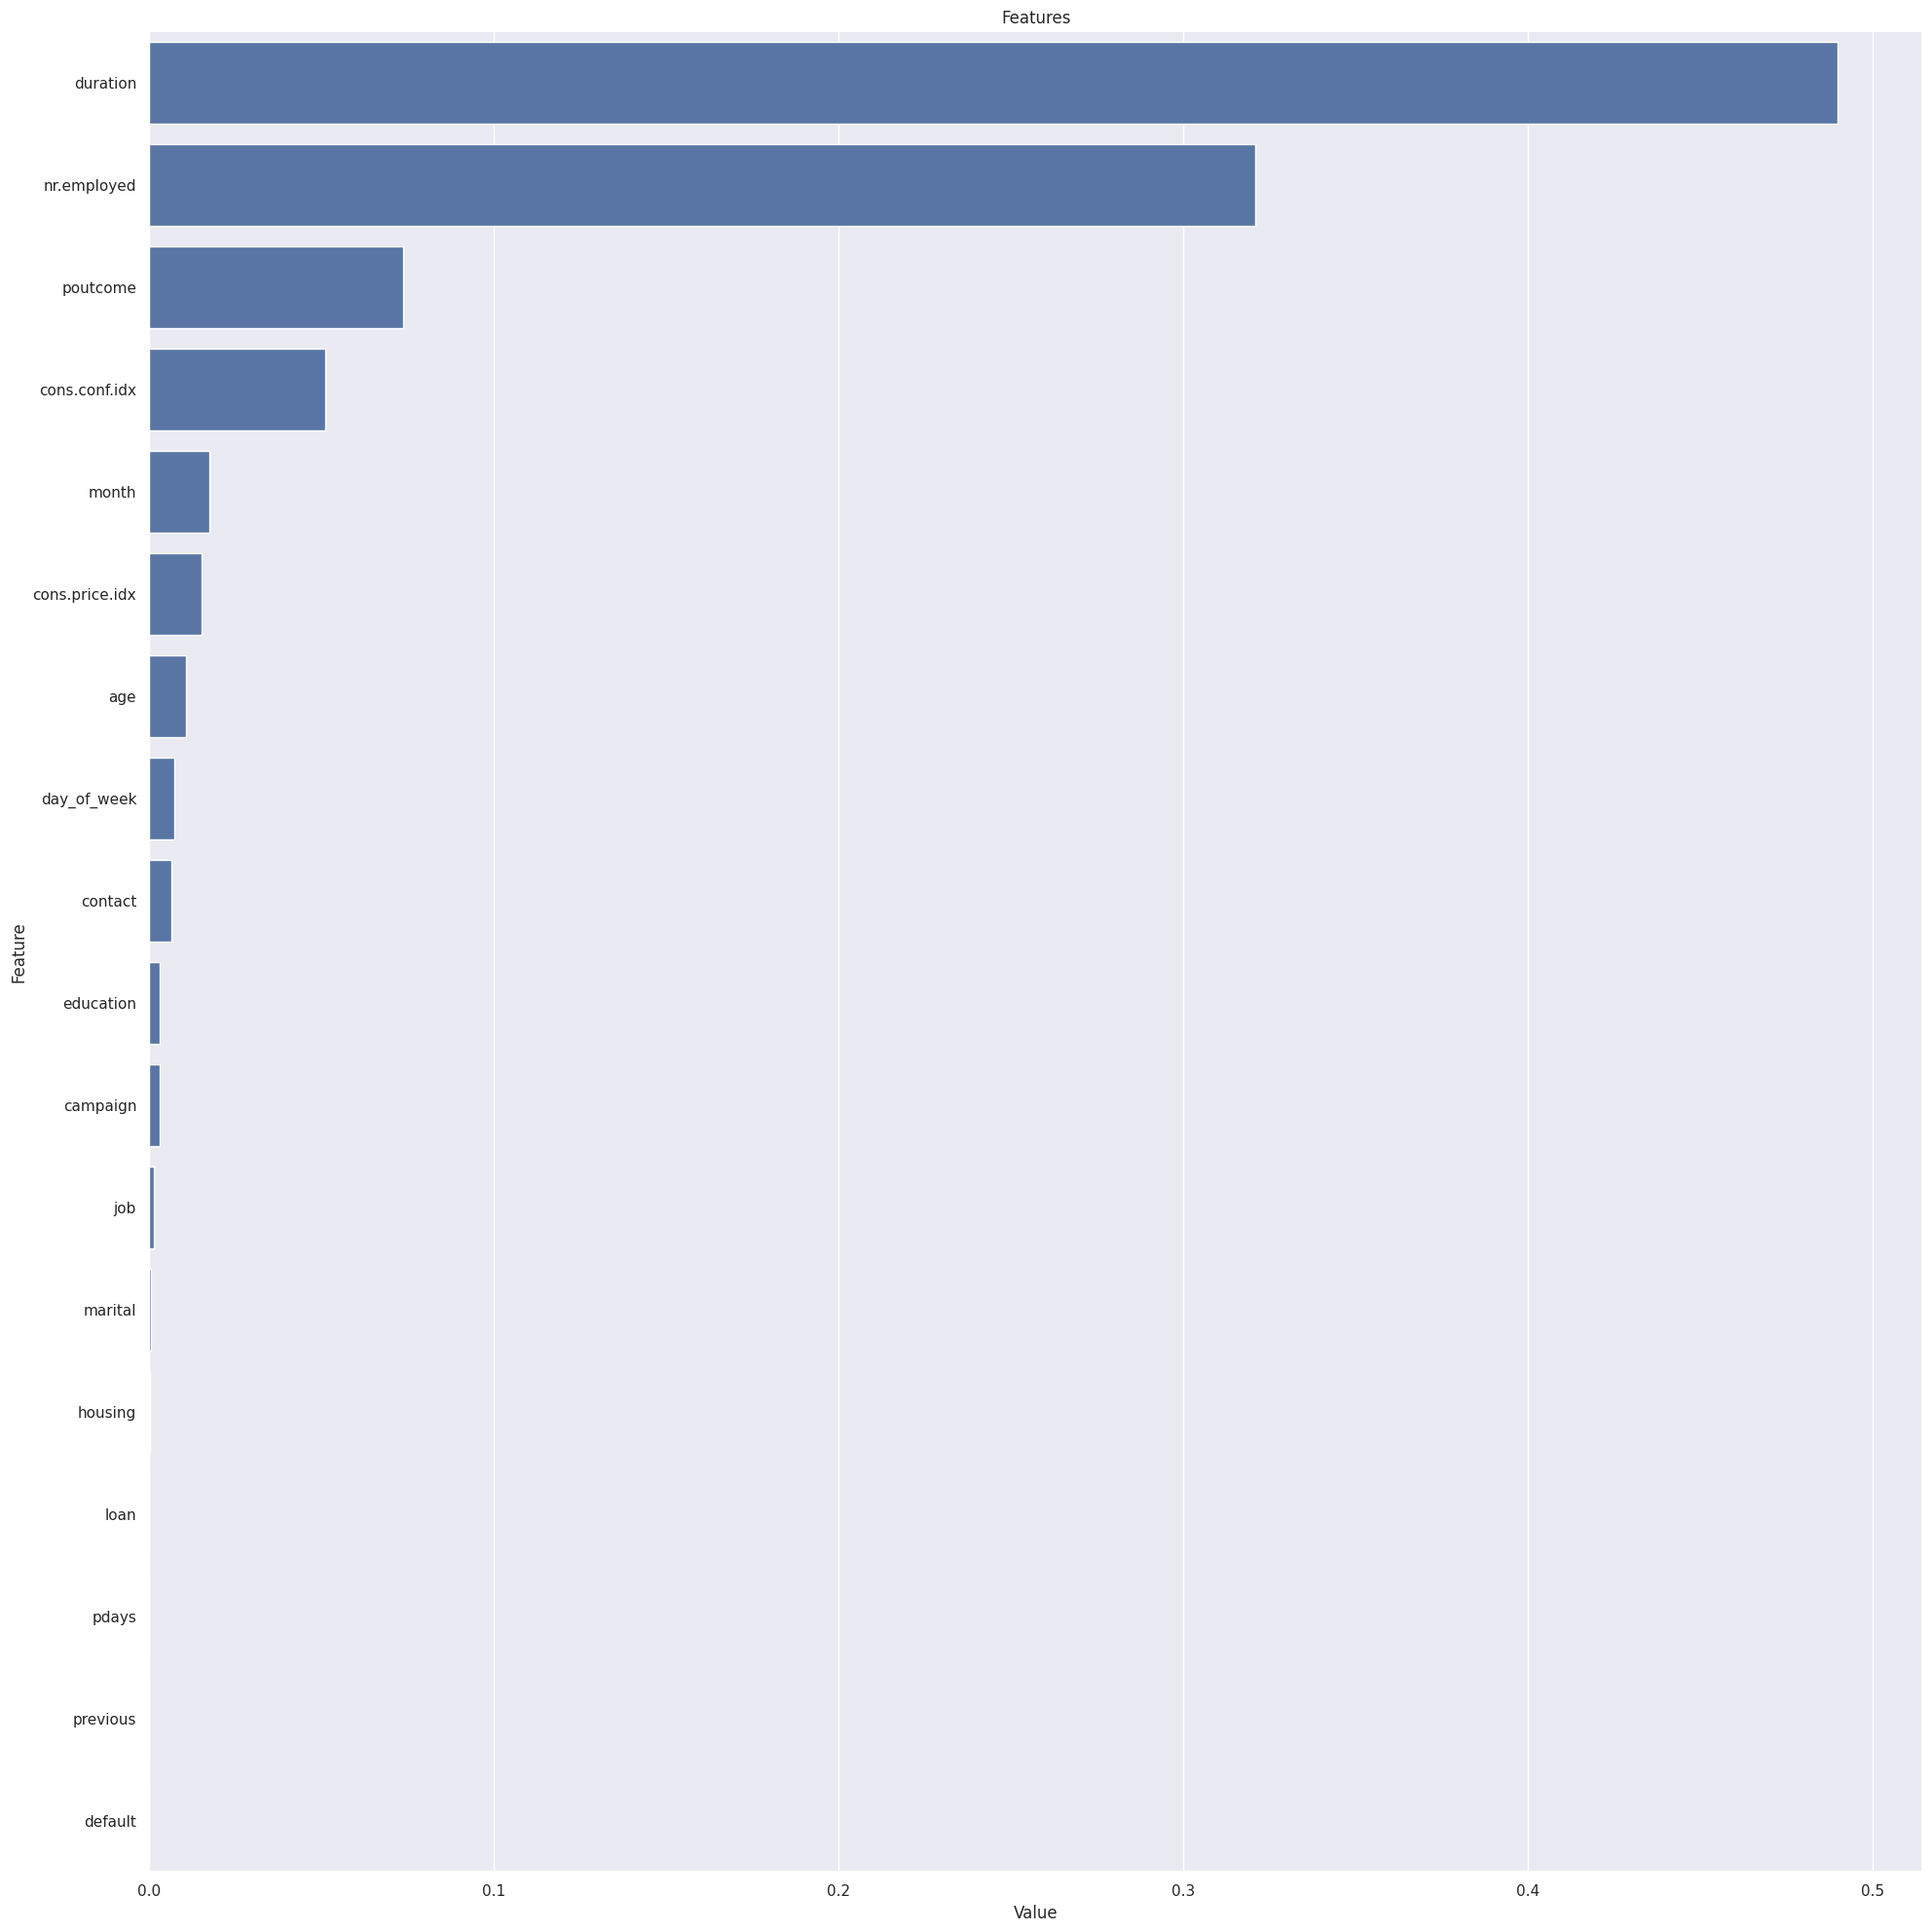

In [85]:
plot_importance(Model,X)

As we can see Duration is the most important feature for our model